<a href="https://colab.research.google.com/github/2003UJAN/CO_2_Emission_GenY_Task/blob/main/Rwanda_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import seaborn as sns

2.15.0


In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
final = pd.read_csv('/content/final.csv')

In [ ]:
train

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.510,29.290,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22652,ID_-1.366_29.434_2020_21,-1.366,29.434,2020,21,0.000125,0.835682,0.000063,0.078337,-30.197637,...,2139.378415,81315.104813,1810.354708,6.122201,0.368520,-100.055426,34.539628,-48.794762,35.627058,25.320370
22653,ID_-1.366_29.434_2020_22,-1.366,29.434,2020,22,0.000064,0.861835,0.000035,0.119498,4.594432,...,2168.785116,82099.971354,1770.703613,5.881005,0.299965,-42.400055,31.431400,-42.935525,34.085824,20.453009
22654,ID_-1.366_29.434_2020_23,-1.366,29.434,2020,23,0.000045,0.871388,0.000065,0.217576,-12.649460,...,4642.661813,64627.438610,3892.145000,9.066800,0.321347,-13.517876,46.460620,-38.135384,32.694253,30.873770
22655,ID_-1.366_29.434_2020_24,-1.366,29.434,2020,24,-0.000157,0.919484,-0.000143,0.138301,24.086378,...,4178.672232,68069.840775,3345.338897,21.744401,0.306436,-41.515276,41.346108,-41.457311,34.688235,32.597363


In [ ]:
train.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [ ]:
train.isna().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    160
Cloud_sensor_zenith_angle     160
Cloud_solar_azimuth_angle     160
Cloud_solar_zenith_angle      160
emission                        1
Length: 76, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22657 entries, 0 to 22656
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      22657 non-null  object 
 1   latitude                                                  22657 non-null  float64
 2   longitude                                                 22657 non-null  float64
 3   year                                                      22657 non-null  int64  
 4   week_no                                                   22657 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  18569 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              18569 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            18569 non-null  float64
 8   SulphurDioxide_c

In [ ]:
test

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,NaN,NaN,NaN,NaN,NaN,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24026,ID_-3.136_30.364_2022_16,-3.136,30.364,2022,16,NaN,NaN,NaN,NaN,NaN,...,58020.149873,4884.728159,65126.892107,3912.781112,12.543290,0.279161,-24.825904,41.943640,-57.454153,28.939367
24027,ID_-3.136_30.364_2022_17,-3.136,30.364,2022,17,-0.000314,0.820571,-0.000257,0.250270,74.990326,...,43866.093913,7244.859749,49868.127547,6244.859848,13.657918,0.261966,-41.682576,31.478158,-55.426028,31.031883
24028,ID_-3.136_30.364_2022_18,-3.136,30.364,2022,18,NaN,NaN,NaN,NaN,NaN,...,61298.516175,4373.077291,69032.351450,3373.077220,16.986094,0.263554,8.611514,42.236715,-45.754790,28.753349
24029,ID_-3.136_30.364_2022_19,-3.136,30.364,2022,19,0.000108,1.284482,0.000139,0.232803,74.966133,...,60176.003110,4504.033611,68008.655623,3504.033611,7.630471,0.264831,-49.973613,43.479770,-49.659584,34.114886


In [ ]:
test.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [ ]:
test.isna().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_surface_albedo          165
Cloud_sensor_azimuth_angle    165
Cloud_sensor_zenith_angle     165
Cloud_solar_azimuth_angle     165
Cloud_solar_zenith_angle      165
Length: 75, dtype: int64

In [ ]:
train.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)
test.drop('ID_LAT_LON_YEAR_WEEK', axis=1, inplace=True)

In [ ]:
train_null_col = []

num_col = 0

for col in train:
    if train[col].isna().sum() > 0:
        train_null_col.append(col)
        num_col = num_col + 1
print('Number of columns with missing values:', num_col)
print(train_null_col)

Number of columns with missing values: 71
['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorbin

In [ ]:
test_null_col = []

num_col = 0

for col in test:
    if test[col].isna().sum() > 0:
        test_null_col.append(col)
        num_col = num_col + 1
print('Number of columns with missing values:', num_col)
print(test_null_col)

Number of columns with missing values: 70
['SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorbin

<Figure size 1000x1000 with 0 Axes>

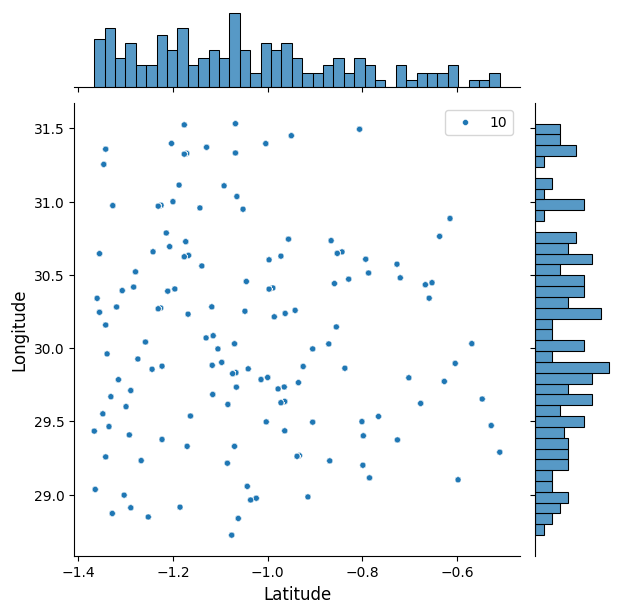

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train.latitude.values, y=train.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

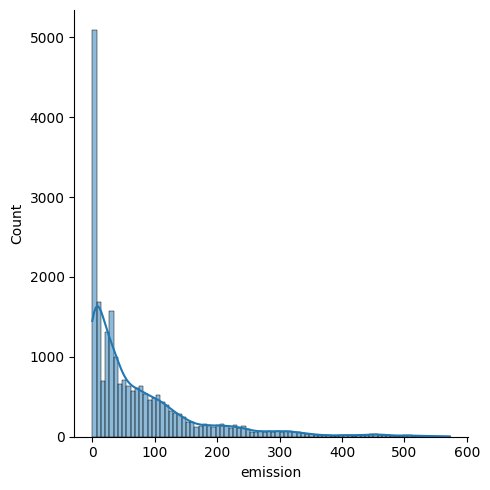

In [ ]:
target = train.pop('emission')

sns.displot(target, kde=True)

In [ ]:
for col in train:
    if train[col].isna().sum() > 0:
        train[col].fillna(train[col].mean(), inplace=True)

for col in test:
    if test[col].isna().sum() > 0:
        test[col].fillna(test[col].mean(), inplace=True)

In [ ]:
from scipy.stats import ks_2samp

to_drop = []
num_col = 0

for col in train:
    stat, pv = ks_2samp(train[col], test[col])
    if pv < 0.05:
        to_drop.append(col)
        num_col = num_col + 1

print(num_col)
print(to_drop)


74
['latitude', 'longitude', 'year', 'week_no', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_abs

<Axes: xlabel='year', ylabel='emission'>

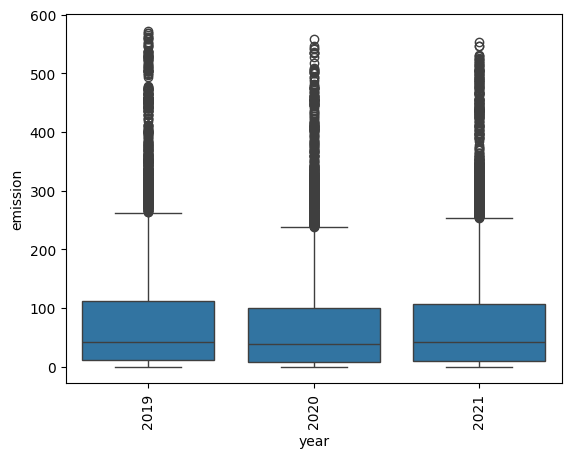

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=train, x="year", y=target)

<Axes: xlabel='year', ylabel='emission'>

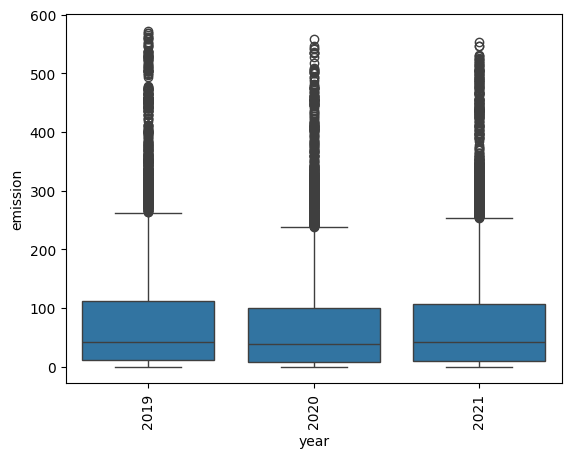

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(data=train, x="year", y=target)

<Axes: >

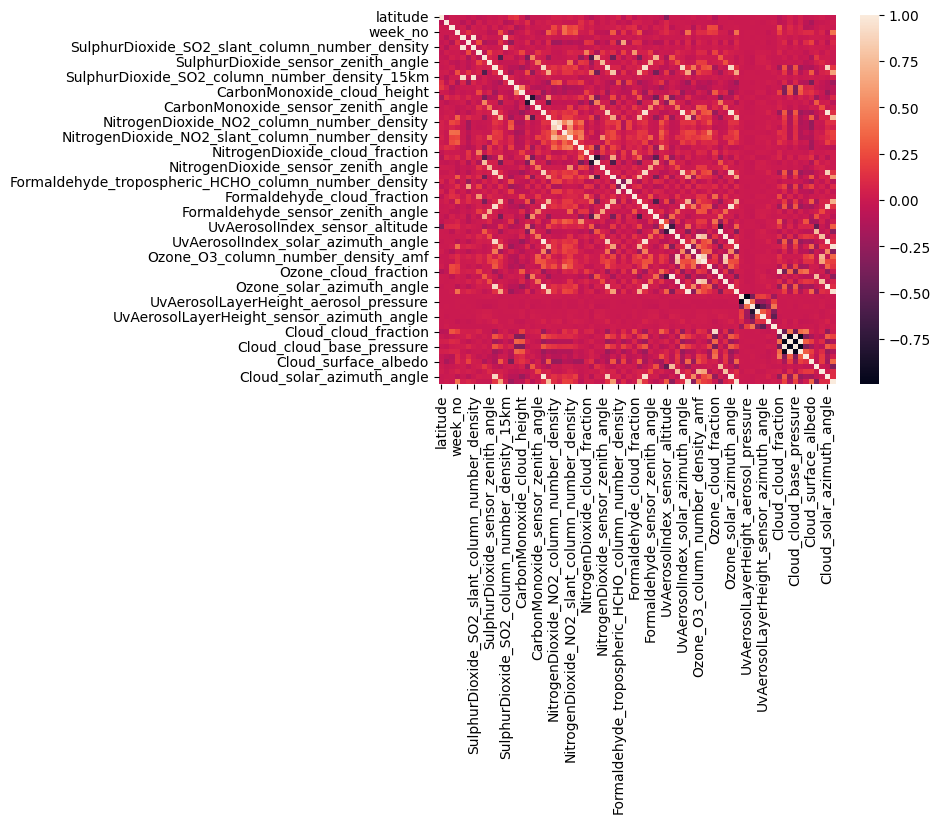

In [ ]:
corr = train.corr()
sns.heatmap(corr)

In [ ]:
# Create correlation matrix
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop features
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)
print(train.shape)

['SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_SO2_column_number_density_15km', 'UvAerosolIndex_solar_azimuth_angle', 'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle', 'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle', 'UvAerosolLayerHeight_aerosol_pressure', 'Cloud_cloud_top_height', 'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height', 'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle']
(22657, 61)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for col in train:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1,1))
    test[col] = scaler.transform(test[col].values.reshape(-1,1))

train

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,...,UvAerosolLayerHeight_sensor_zenith_angle,UvAerosolLayerHeight_sensor_azimuth_angle,UvAerosolLayerHeight_solar_azimuth_angle,UvAerosolLayerHeight_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle
0,2.443812,-1.129595,-1.221871,-1.698643,-6.170340e-01,-1.521596,1.536223,-1.569002e+00,1.054663,-1.276717e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-5.445381e-02,0.202158,-0.318124,-0.332207,-0.046049,-0.725171
1,2.443812,-1.129595,-1.221871,-1.633271,-5.429335e-02,-0.748114,-0.399610,4.079806e-01,0.147418,-1.587362e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-2.049230e+00,1.399790,-0.812205,-0.681897,1.423974,-0.097571
2,2.443812,-1.129595,-1.221871,-1.567900,2.101248e+00,-0.624641,-0.725201,1.372608e+00,1.211620,-1.854774e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,5.100625e-01,0.481149,0.079478,-0.811471,0.911669,-1.561487
3,2.443812,-1.129595,-1.221871,-1.502528,-2.959092e-17,0.000000,0.000000,-1.524406e-17,0.000000,4.078600e-16,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,9.241327e-01,-0.844833,-0.331172,-0.564010,-0.000377,-2.524254
4,2.443812,-1.129595,-1.221871,-1.437157,-4.878911e-01,-1.068874,-0.552145,1.939271e-01,-0.133257,-1.487906e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-2.176023e+00,0.945990,-0.853576,-1.156473,1.703452,-0.443676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22652,-1.471552,-0.924769,0.002865,-0.325844,3.999235e-01,-0.084146,-1.217101,-3.950980e-01,0.026102,1.181826e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-2.494408e+00,3.132493,-0.996708,1.844170,-3.035667,-0.899896
22653,-1.471552,-0.924769,0.002865,-0.260473,1.352793e-01,0.077432,-0.578011,2.020481e-01,-0.549500,1.283386e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-2.118739e+00,3.153965,-1.014035,0.293673,-1.064095,-1.396868
22654,-1.471552,-0.924769,0.002865,-0.195101,5.391894e-02,0.136457,0.944781,-9.391369e-02,1.776213,1.310261e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-3.585157e-01,0.885632,-0.785181,0.777272,-0.076445,1.006142
22655,-1.471552,-0.924769,0.002865,-0.129730,-8.307168e-01,0.433603,-0.286076,5.365939e-01,0.815625,1.453362e+00,...,5.173366e-15,2.732413e-15,2.886264e-15,1.653284e-14,-3.482255e-01,1.150777,0.125524,0.440030,-1.033839,0.188387


In [ ]:
y = target
X = train
X_test = test

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Assuming 'X' is your feature matrix and 'y' is your target variable
# You might want to handle missing values in 'y' before proceeding

# For example, you can drop rows with missing values in 'y':
data = pd.concat([X, y], axis=1).dropna()

# Separate X and y again
X = data.drop(columns=[y.name])
y = data[y.name]

# Now you can proceed with feature selection
estimator = LinearRegression()
rfe = RFE(estimator)
X_rfe = rfe.fit_transform(X, y)
estimator.fit(X_rfe, y)
cols = list(X.columns)

temp = pd.Series(rfe.support_, index=cols)
featureRFE = temp[temp==True].index.tolist()
print("Selected features: ", featureRFE)


Selected features:  ['latitude', 'longitude', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_absorbing_aerosol_index', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude', 'NitrogenDioxide_sensor_azimuth_angle', 'NitrogenDioxide_sensor_zenith_angle', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'Formaldehyde_HCHO_slant_column_number_density', 'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle', 'Formaldehyde_solar_azimuth_angle', 'UvAerosolIndex_sensor_altitude', 'U

In [ ]:
X = X[featureRFE]
y = y
X_test = X_test[featureRFE]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape)

(20390, 30) (2266, 30) (20390,) (2266,) (24031, 30)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Concatenate, Normalization, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential(name='CO2')
model.add(Dense(126, input_dim=X_train.shape[1], activation= "relu", name = 'hidden1'))
model.add(Dense(126, activation= "relu", name = 'hidden2'))
model.add(Dense(1, activation='linear', name='output'))

model.compile(loss= "mean_squared_error" , optimizer="RMSprop", metrics=["mse"])

model.summary()

Model: "CO2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 126)               3906      
                                                                 
 hidden2 (Dense)             (None, 126)               16002     
                                                                 
 output (Dense)              (None, 1)                 127       
                                                                 
Total params: 20035 (78.26 KB)
Trainable params: 20035 (78.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
mc = ModelCheckpoint ('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=32,callbacks=[early_stopping, mc])
val_loss, val_acc = model.evaluate(X_val, y_val)
print('val loss:', val_loss)
print('val accuracy:', val_acc)

Epoch 1/100
638/638 [==============================] - 3s 4ms/step - loss: 8181.6387 - mse: 8181.6387 - val_loss: 6590.0127 - val_mse: 6590.0127
Epoch 2/100
 39/638 [>.............................] - ETA: 2s - loss: 6867.0322 - mse: 6867.0322

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


638/638 [==============================] - 2s 3ms/step - loss: 7051.9189 - mse: 7051.9189 - val_loss: 6442.5850 - val_mse: 6442.5850
Epoch 3/100
638/638 [==============================] - 2s 3ms/step - loss: 6934.9517 - mse: 6934.9517 - val_loss: 6348.0435 - val_mse: 6348.0435
Epoch 4/100
638/638 [==============================] - 2s 3ms/step - loss: 6802.6006 - mse: 6802.6006 - val_loss: 6133.3486 - val_mse: 6133.3486
Epoch 5/100
638/638 [==============================] - 2s 3ms/step - loss: 6702.9502 - mse: 6702.9502 - val_loss: 6331.8232 - val_mse: 6331.8232
Epoch 6/100
638/638 [==============================] - 2s 3ms/step - loss: 6618.3296 - mse: 6618.3296 - val_loss: 6010.3306 - val_mse: 6010.3306
Epoch 7/100
638/638 [==============================] - 2s 4ms/step - loss: 6549.1475 - mse: 6549.1475 - val_loss: 6039.6416 - val_mse: 6039.6416
Epoch 8/100
638/638 [==============================] - 2s 4ms/step - loss: 6473.6611 - mse: 6473.6611 - val_loss: 5969.9707 - val_mse: 5969.97

<function matplotlib.pyplot.show(close=None, block=None)>

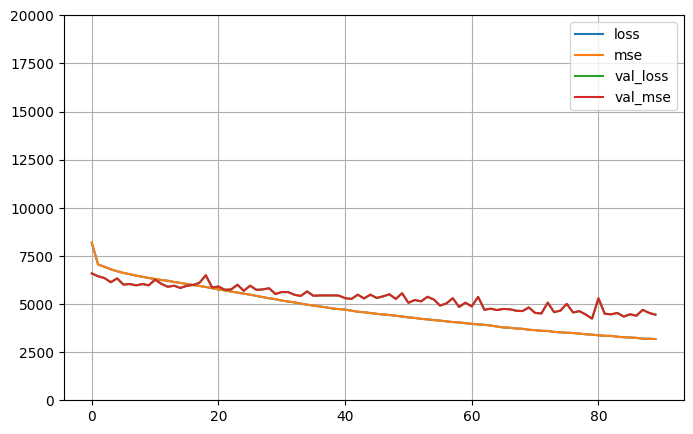

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,20000)
plt.show

In [ ]:
y_pred = model.predict(X_val)
y_pred = abs(y_pred)
y_pred = y_pred.flatten()
y_pred

71/71 [==============================] - 0s 2ms/step


array([ 10.337012,  32.889313,  53.67872 , ..., 304.29572 ,  20.78825 ,
        47.08366 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error

rms = np.sqrt(mean_squared_error(y_val, y_pred))
rms

66.06376382896931

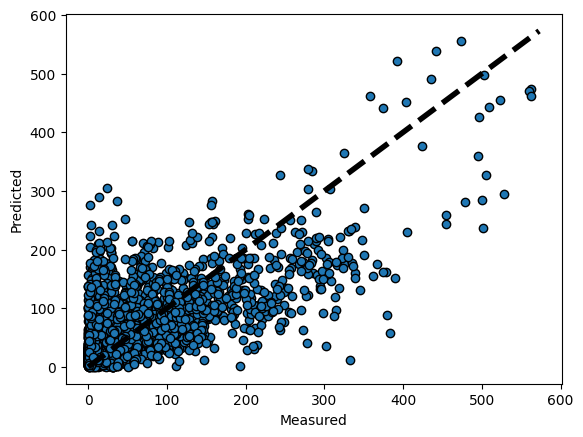

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_val, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
df_val=pd.DataFrame({'actual_value': y_val.ravel(), 'predicted_value':y_pred.ravel()})
df_val

,actual_value,predicted_value
0,33.282234,10.337012
1,1.354654,32.889313
2,46.243053,53.678719
3,12.854871,0.150812
4,1.842655,32.253647
...,...,...
2261,88.940210,33.182587
2262,37.116467,2.072624
2263,24.479616,304.295715
2264,19.872679,20.788250


In [ ]:
predictions = model.predict(X_test)
predictions = abs(predictions)
predictions = predictions.flatten()
predictions

751/751 [==============================] - 1s 2ms/step


array([1.7588408e+01, 1.3255022e+01, 8.5815936e-02, ..., 2.8281644e+02,
       2.7888824e+02, 2.5607748e+02], dtype=float32)

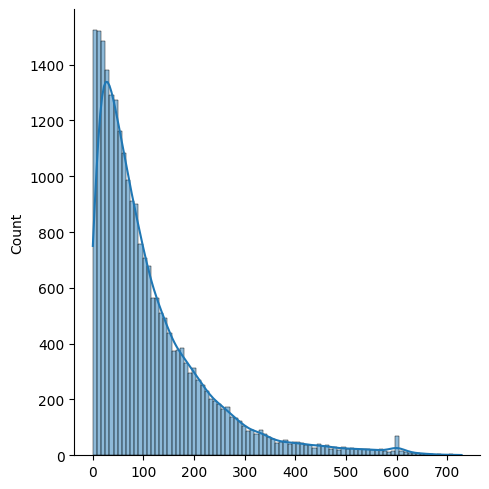

In [ ]:
sns.displot(predictions,kde=True)

In [ ]:
final['emission'] = predictions
final.to_csv('final.csv', index=False)
final = pd.read_csv('final.csv')
final

ValueError: Length of values (24031) does not match length of index (24353)